# Pattern Recognition

In [2]:
from ml.activations import softmax, relu
from ml.layers import FullyConnected, Conv2D, MaxPool2D, Flatten
from ml.losses import cross_entropy
from ml.neural_network import NeuralNetworkClassifier
from optimization.unconstrained.adam import Adam
from utils import load_mnist
from sklearn.metrics import classification_report
from utils import plot_model_accuracy, plot_model_loss

iter	f(x)		||g(x)||
   0	1.4997e+01	8.2302e+04
  10	1.2940e+00	1.4334e+04
  20	7.9473e-01	9.7746e+03
  30	3.8444e-01	4.9019e+03
  40	2.2791e-01	4.0817e+03
  50	1.9001e-01	3.2618e+03
  60	2.4068e-01	3.0205e+03
  70	1.5415e-01	2.3358e+03
  80	1.7662e-01	2.4018e+03
  90	1.1811e-01	3.1774e+03
 100	3.8982e-02	1.1938e+03
 110	1.0732e-01	2.3777e+03
 120	1.1638e-01	2.3034e+03
 130	7.5517e-02	1.5238e+03
 140	6.1957e-02	1.8298e+03
 150	3.6640e-02	1.6709e+03
 160	7.2240e-02	1.0943e+03
 170	9.9572e-02	1.3749e+03
 180	2.9454e-02	1.0589e+03
 190	6.7099e-02	1.6280e+03
 200	2.5030e-02	1.0618e+03
 210	8.5319e-02	1.3548e+03
 220	4.0328e-02	9.9380e+02
 230	5.2613e-02	1.4232e+03
 240	5.5963e-02	1.1864e+03
 250	1.1827e-01	1.2468e+03
 260	2.0421e-02	8.1229e+02
 270	4.7692e-02	1.2380e+03
 280	4.2110e-02	9.6759e+02
 290	2.1915e-02	6.4369e+02
 300	9.5776e-02	1.3140e+03


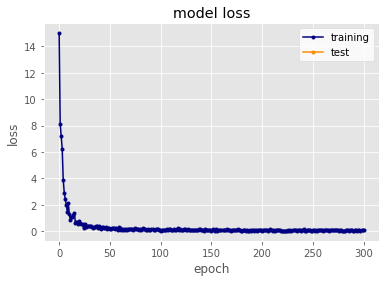

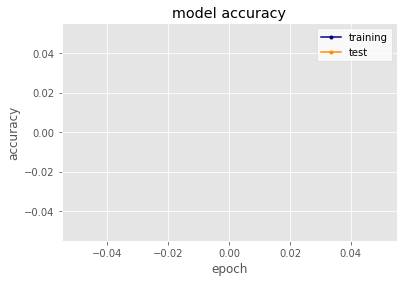

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       980
           1       0.94      0.97      0.96      1135
           2       0.91      0.89      0.90      1032
           3       0.90      0.88      0.89      1010
           4       0.93      0.91      0.92       982
           5       0.93      0.90      0.91       892
           6       0.95      0.94      0.94       958
           7       0.94      0.81      0.87      1028
           8       0.76      0.92      0.83       974
           9       0.87      0.89      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [6]:
X_train, X_test, y_train, y_test = load_mnist()

cnn = NeuralNetworkClassifier(
    (Conv2D(in_channels=1, out_channels=6, kernel_size=(5, 5), strides=(1, 1),
            padding='same', channels_last=True, activation=relu),  # => [n,28,28,6]
     MaxPool2D(pool_size=(2, 2), strides=(2, 2)),  # => [n,14,14,6]
     Conv2D(in_channels=6, out_channels=16, kernel_size=(5, 5), strides=(1, 1),
            padding='same', channels_last=True, activation=relu),  # => [n,14,14,16]
     MaxPool2D(pool_size=(2, 2), strides=(2, 2)),  # => [n,7,7,16]
     Flatten(),  # => [n,7*7*16]
     FullyConnected(n_in=7 * 7 * 16, n_out=10, activation=softmax)),
    loss=cross_entropy, optimizer=Adam, learning_rate=0.002, 
    epochs=300, batch_size=64, verbose=10)
cnn.fit(X_train, y_train)
plot_model_loss(cnn.loss_history)
plot_model_accuracy(cnn.accuracy_history)
print(classification_report(y_test, cnn.predict(X_test)))